# Partial dependence plots to show model predictions

Getting started

In [1]:
import pickle
import joblib

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
# from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import PartialDependenceDisplay
from sklearn.preprocessing import StandardScaler

from matplotlib import rcParams

#### Working directory

In [ ]:
os.chdir(os.path.join('my', 'directory'))

Importing functions from a self-made module

In [2]:
from init_modeling import unpickle_model
from init_modeling import generate_X

Plot parameters
Here we set the fontsize and type that will be used in the final Matplotlib PDP plot generated by sklearn

In [15]:
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 16  # Change this value to adjust the base font size
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 16
#sns.set_style('whitegrid')

#### File import

Note that the RateBeer dataset is only available upon written permission from RateBeer (ZX Ventures, USA).
The steps are identical for using partial dependence plots to analyze a model trained on the trained panel dataset. You only need to import that dataset here, and choose an appropriate model (that was trained on that data).

In [4]:
# dataset = pd.read_csv(os.path.join(root, 'BeerAromas', 'Figures', 'FinalFigures', 'SHAP plot for final model', "chem_dataset_ratebeer.csv")).set_index('beer')

chem_dataset = pd.read_csv('Supplemental File S1.csv').set_index('beer')
trained_panel_dataset = pd.read_csv('Supplemental File S4.csv').set_index('beer')
chem_dataset_expertpanel = chem_dataset.join(trained_panel_dataset)

compounds_clean = (pd.read_csv(os.path.join(root,'BeerAromas','Data','compounds.csv'),
                               encoding = 'utf-8')
                   .set_index('field_name_R')
                   .loc[dataset.loc[:,'acetaldehyde':'sulfur_sum'].columns.tolist(),'chemical_name']
                   .apply(lambda x: x if x in ['pH','α-calacorene',
                                               'α-eudesmol','α-humulene','α-muurolol','α-phellandrene',
                                               'α-terpinyl isobutanoate','β-cyclohomocitral',
                                               'β-humulene','β-phellandrene','Z,Z-farnesol'] else x.capitalize()))

# mapping_columnnames = pd.read_csv(os.path.join(root,"BeerPanel","DataProcessing","Mapping_ColumnNames.csv"))

Split into test and train set

In [5]:
# Y = dataset.loc[:,['ave_score_5', 'aroma_10', 'appearance_5', 'taste_10', 'palate_5', 'overall_20']]
# y_class = dataset['tasting_category_fine']
#
# X = generate_X(pd.concat([dataset['beer_id'], dataset.loc[:,'acetaldehyde':'sulfur_sum']], axis=1), impute=True)
#
# X_train, X_test, Yrb_train, Yrb_test = train_test_split(X, Y, test_size=0.30,
#                                                         random_state=0, shuffle=True,
#                                                         stratify=y_class)

X = generate_X(pd.concat([chem_dataset_expertpanel['beer_id'] , chem_dataset_expertpanel.loc[:,'acetaldehyde':'sulfur_sum']], axis=1), impute=True)
Y = chem_dataset_expertpanel.loc[:,'A_malt_all':'overall']
y_class = chem_dataset_expertpanel.loc[:,'tasting_category_fine']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,
                                                    random_state=0, shuffle=True, stratify=y_class)

Scaling data

Because the data was scaled when training the model, we also need to scale it here for the PDP to make sense.

In [6]:
scaler_X = StandardScaler().fit(X_train)

X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

#### Partial Dependence Plot

Again: we need to edit the model files for this script to run properly.
Noe that the 'try' function before the unpickle_model command makes sure that we don't see the errors that it normally returns.


To obtain Figure 7. from the paper, we need to make this plot for ChemCompletelog ratebeer data (not TF-IDF)

In [7]:
model = joblib.load(os.path.join(root, 'BeerAromas', 'Final models with final dataset', 'models', 'Gradient_Boost_regressor_overall_20_ratebeer.pkl'))

indices = np.array([X.columns.get_loc("ethyl_acetate"),
                    X.columns.get_loc("ethanol..v.v."),
                    X.columns.get_loc("protein.g.L."),
                    X.columns.get_loc("lactic_acid.mg.L."),
                    X.columns.get_loc("ethyl_octanoate"),
                    X.columns.get_loc("ethyl.phenylacetate")])

features_ind = ([indices[0], indices[[0,1]], indices[[0,2]], indices[[0,3]], indices[[0,4]], indices[[0,5]]] +
                [indices[[1,0]], indices[1], indices[[1,2]], indices[[1,3]], indices[[1,4]], indices[[1,5]]] +
                [indices[[2,0]], indices[[2,1]], indices[2], indices[[2,3]], indices[[2,4]], indices[[2,5]]] +
                [indices[[3,0]], indices[[3,1]], indices[[3,2]], indices[3], indices[[3,4]], indices[[3,5]]] +
                [indices[[4,0]], indices[[4,1]], indices[[4,2]], indices[[4,3]], indices[4], indices[[4,5]]] +
                [indices[[5,0]], indices[[5,1]], indices[[5,2]], indices[[5,3]], indices[[5,4]], indices[5]])

c:\program files\python38\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DummyRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GradientBoostingRegressor from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results

Running a loop to make all the images and saving them as svg

ValueError: left cannot be >= right

<Figure size 640x480 with 0 Axes>

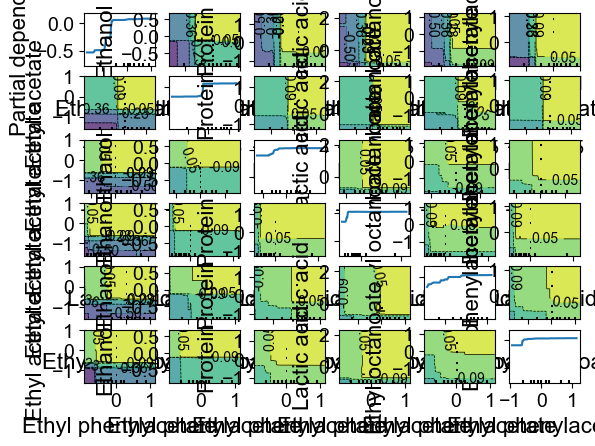

In [15]:
myfig = PartialDependenceDisplay.from_estimator(model,
                                                X_train,
                                                features = features_ind,
                                                feature_names = compounds_clean,
                                                n_jobs = 8,
                                                contour_kw = plt.viridis(),
                                                random_state = 0,
                                                n_cols = 6,
                                                method = 'recursion')

myfig.figure_.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)
myfig.figure_.set_size_inches(25, 25)
myfig.figure_.savefig(f'C:/users/u0116955/Dropbox (Verstrepen.lab)/BeerAromas/Figures/FinalFigures/PDP plots/Gradient Boost PDP_recursion_method_rerun_scaled_fontsize.svg', format = 'svg')